Descriptive Statistics

Michaell Abelard Hendra - 71487

In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('SuperStoreOrders.csv',encoding = 'latin1')
print(df.head(5))

          order_id  order_date   ship_date       ship_mode    customer_name  \
0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage      

In [40]:
data.isnull().sum()

shipping_cost    0
dtype: int64

In [54]:
df['sales'] = df['sales'].str.replace(',', '').astype(float)

In [5]:
data = df['shipping_cost']
print(data.head(5))
print(" ")
print(data.info())

0    35.46
1     9.72
2     8.17
3     4.82
4     4.70
Name: shipping_cost, dtype: float64
 
<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: shipping_cost
Non-Null Count  Dtype  
--------------  -----  
51290 non-null  float64
dtypes: float64(1)
memory usage: 400.8 KB
None


Measures of Central Tendency

In [6]:
print('Rata-Rata: ',data.mean())
print('Median: ',data.median())
print('Modus: ',data.mode())

Rata-Rata:  26.375915188145836
Median:  7.79
Modus:  0    0.86
Name: shipping_cost, dtype: float64


Measures of Dispersion

In [12]:
print(f'Variansi: {data.var():.2f}')
print(f'Standard Deviasi: {data.std():.2f}')
print(f'Range: {np.ptp(data)}')

Variansi: 3282.92
Standard Deviasi: 57.30
Range: 933.57


In [17]:
q1 = data.quantile(0.25)
print("Quantile 1: ",q1)
q2 = data.quantile(0.5)
print("Quantile 2: ",q2)
q3 = data.quantile(0.75)
print("Quantile 3: ",q3)
print(" ")
print("Interquantile Range: ",q3-q1)

Quantile 1:  2.61
Quantile 2:  7.79
Quantile 3:  24.45
 
Interquantile Range:  21.84


In [20]:
batas_bawah = int((q1 - 1.5 * (q3-q1)))
batas_atas = int((q3 + 1.5 * (q3-q1)))

print("Batas bawah: ",batas_bawah)
print("Batas Atas: ",batas_atas)

cek = data[(data >= batas_bawah) & (data <= batas_atas)]
print(cek.head())



Batas bawah:  -30
Batas Atas:  57
0    35.46
1     9.72
2     8.17
3     4.82
4     4.70
Name: shipping_cost, dtype: float64


<Axes: >

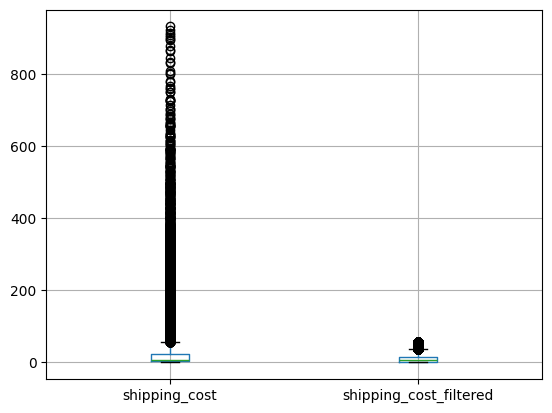

In [ ]:

data = pd.DataFrame({'shipping_cost':data})
cek = pd.DataFrame({'shipping_cost':cek})
data.join(cek, rsuffix='_filtered').boxplot()

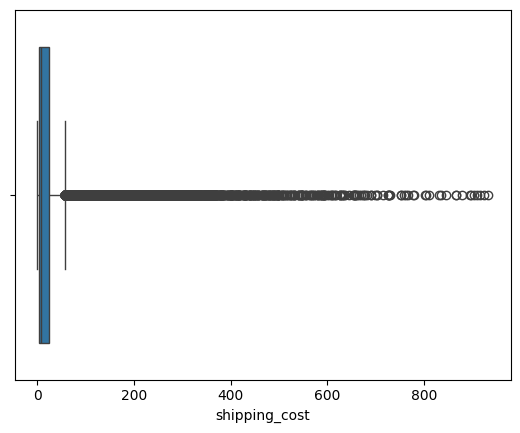

In [45]:
sns.boxplot(x=df['shipping_cost'])
plt.show()

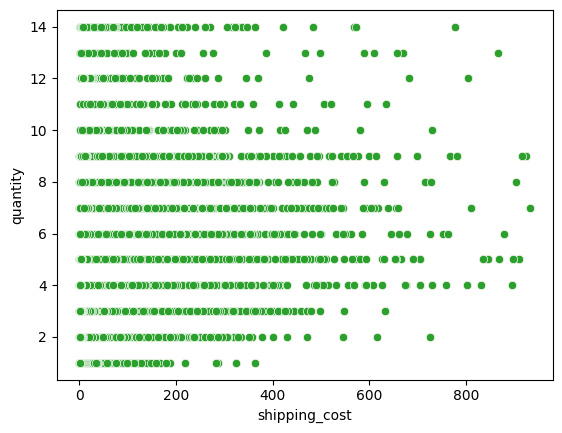

In [38]:
import seaborn as sns
sns.scatterplot(x='shipping_cost', y='quantity', data=df)
plt.show()

       shipping_cost  discount  sales    profit  quantity
0              35.46       0.0  408.0  106.1400         2
1               9.72       0.1  120.0   36.0360         3
2               8.17       0.0   66.0   29.6400         4
3               4.82       0.5   45.0  -26.0550         3
4               4.70       0.1  114.0   37.7700         5
...              ...       ...    ...       ...       ...
51285           0.89       0.2   14.0    4.5188         2
51286           0.49       0.0    4.0    0.4200         1
51287           0.35       0.0   26.0   12.3600         3
51288           0.20       0.0    7.0    0.5600         1
51289           0.17       0.2    3.0   -0.6048         3

[51290 rows x 5 columns]


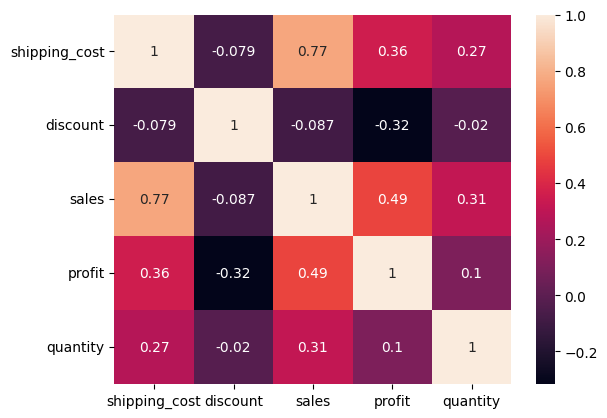

In [55]:
data2=df[['shipping_cost','discount','sales','profit','quantity']]
print(data2)
data2.corr()
sns.heatmap(data2.corr(),annot=True)
plt.show()